In [50]:
import json
import pandas as pd
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open("cisa-kev.json") as json_file:
    data = json.load(json_file)

print(data.keys())
print(f'date released: {data["dateReleased"]}')
print(f'count: {data["count"]}')
print(f'catalog version: data["catalogVersion"]')
      

dict_keys(['title', 'catalogVersion', 'dateReleased', 'count', 'vulnerabilities'])
date released: 2023-08-02T14:11:52.3059Z
count: 981
catalog version: data["catalogVersion"]


In [4]:
vulns = pd.DataFrame.from_dict(data["vulnerabilities"])

pprint(vulns)

              cveID vendorProject                         product  \
0    CVE-2021-27104     Accellion                             FTA   
1    CVE-2021-27102     Accellion                             FTA   
2    CVE-2021-27101     Accellion                             FTA   
3    CVE-2021-27103     Accellion                             FTA   
4    CVE-2021-21017         Adobe              Acrobat and Reader   
..              ...           ...                             ...   
976  CVE-2023-38205         Adobe                      ColdFusion   
977  CVE-2023-35078        Ivanti  Endpoint Manager Mobile (EPMM)   
978  CVE-2023-38606         Apple               Multiple Products   
979  CVE-2023-37580        Zimbra             Collaboration (ZCS)   
980  CVE-2023-35081        Ivanti  Endpoint Manager Mobile (EPMM)   

                                     vulnerabilityName   dateAdded  \
0     Accellion FTA OS Command Injection Vulnerability  2021-11-03   
1     Accellion FTA OS Command 

# Search for a specific Product

In [5]:
search_input = "MOVEit"

In [6]:
filtered_df = vulns[(vulns["cveID"] == search_input) | (vulns["vendorProject"] == search_input) | (vulns["product"].str.contains(search_input))]

In [7]:
print(filtered_df)

              cveID vendorProject          product  \
941  CVE-2023-34362      Progress  MOVEit Transfer   

                                     vulnerabilityName   dateAdded  \
941  Progress MOVEit Transfer SQL Injection Vulnera...  2023-06-02   

                                      shortDescription  \
941  Progress MOVEit Transfer contains a SQL inject...   

                             requiredAction     dueDate  \
941  Apply updates per vendor instructions.  2023-06-23   

                                                 notes  
941  This CVE has a CISA AA located here: https://w...  


In [8]:
df_original_case = vulns.copy()

# Get the original case of the filtered records
filtered_df_original_case = df_original_case.loc[filtered_df.index]

# Set the display option to show all rows
pd.options.display.max_rows = None

# Print the filtered records with the original case
print(filtered_df_original_case[["cveID", "vendorProject", "product", "requiredAction"]])

              cveID vendorProject          product  \
941  CVE-2023-34362      Progress  MOVEit Transfer   

                             requiredAction  
941  Apply updates per vendor instructions.  


# Quick stats

In [42]:
# Convert the dateAdded column to a datetimelike value
vulns["dateAdded"] = pd.to_datetime(vulns["dateAdded"])

# Extract the year from the date column
vulns["year"] = vulns["dateAdded"].dt.year

# Group the DataFrame by year
year_stats = vulns["year"].value_counts().sort_index(ascending=True)

# Print 
year_stats

year
2021    311
2022    557
2023    113
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


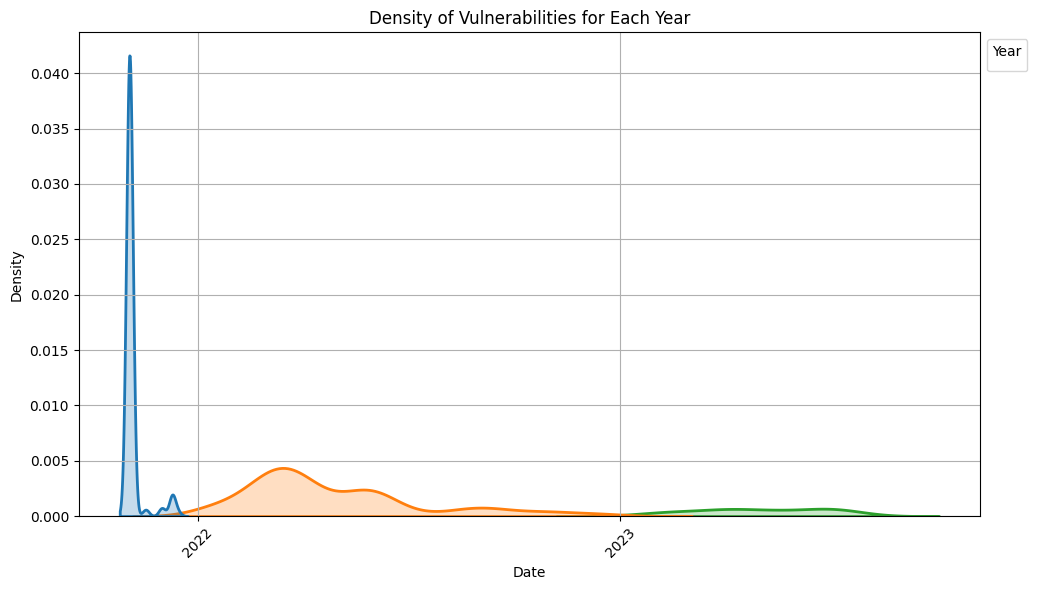

In [54]:
# Convert the dateAdded column to a datetimelike value
vulns["dateAdded"] = pd.to_datetime(vulns["dateAdded"])

# Extract the year from the date column
vulns["year"] = vulns["dateAdded"].dt.year

# Plotting the density chart for all years with different colors
# Convert the dateAdded column to a datetimelike value
vulns["dateAdded"] = pd.to_datetime(vulns["dateAdded"])

# Extract the year from the date column
vulns["year"] = vulns["dateAdded"].dt.year

# Plotting the density chart for all years with different colors
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.kdeplot(data=vulns, x="dateAdded", hue="year", fill=True, palette="tab10", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Density')
plt.title('Density of Vulnerabilities for Each Year')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set x-axis ticks as years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis as years
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better readability
plt.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Get KEV entries from today

In [37]:
#today = datetime.today().strftime('%Y-%m-%d')

#today = datetime.strptime("2021-11-03", '%Y-%m-%d')
today = datetime.strptime("2023-07-31", '%Y-%m-%d')

filtered_df = vulns.loc[vulns['dateAdded'] == today]

print(filtered_df)

              cveID vendorProject                         product  \
980  CVE-2023-35081        Ivanti  Endpoint Manager Mobile (EPMM)   

                                     vulnerabilityName  dateAdded  \
980  Ivanti Endpoint Manager Mobile (EPMM) Path Tra... 2023-07-31   

                                      shortDescription  \
980  Ivanti Endpoint Manager Mobile (EPMM) contains...   

                                        requiredAction     dueDate  \
980  Apply mitigations per vendor instructions or d...  2023-08-21   

                                                 notes  year  
980  https://forums.ivanti.com/s/article/CVE-2023-3...  2023  
